### the code below makes jupyter full screen. You can disable it if it raisess an eror in your python version

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:100% !important; }</style>"))


# dLDS Tutorial: Learn Dynamics from Time Series Data

**What is dLDS?**

dLDS (Decomposed Linear Dynamical Systems) is a method to understand how things change over time.

Imagine you are watching a ball bouncing. The ball follows some rules (physics). dLDS tries to learn these rules from data.

**What will you learn in this tutorial?**

1. How to load or create data
2. How to fit a dLDS model
3. How to see the results
4. How to make nice plots

**Let's start!**

---
## Step 1: Import the libraries

First, we need to load the tools we will use.

- `numpy` = for math with arrays
- `matplotlib` = for making plots
- `dlds` = our main tool

In [46]:
import os
if 'examples' in os.getcwd():
    os.chdir('..')
print(os.getcwd())    
import numpy as np
import matplotlib.pyplot as plt


print("All libraries loaded successfully!")
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

E:\ALL_PHD_MATERIALS\CODES\dLDS_OOP
All libraries loaded successfully!


In [47]:
from importlib import reload
import dlds
dlds = reload(dlds)

from dlds import Direct_dLDS, dLDS_config
from dlds.vis import *
from synthetic import generate_dlds_synthetic_data

---
## Step 2: Create or load your data

**Your data should be:**
- A 2D array (matrix)
- Shape: `(n_dims, T)` where:
  - `n_dims` = number of variables (e.g., x, y, z positions)
  - `T` = number of time points

**Example:**
- 3 variables measured at 600 time points → shape is `(3, 600)`

**In this tutorial:** We will create fake data using the Lorenz system (a famous chaotic system that looks like a butterfly).

In [48]:
# Settings for our data
latent_dim = 3      # 3 dimensions (x, y, z)
T = 600             # 600 time points
num_subdyns = 5     # we will use 5 dynamics operators

# Create Lorenz data
x, true_F, true_c = generate_dlds_synthetic_data(
    latent_dim=latent_dim, 
    T=T, 
    num_subdyns=num_subdyns,
    noise_std=0.001,    # small noise
    seed=42,            # for reproducibility
    structured='lorenz' # use Lorenz system
)

# Check the shape
print("Data shape:", x.shape)
print("This means: %d dimensions, %d time points" % (x.shape[0], x.shape[1]))

Data shape: (3, 600)
This means: 3 dimensions, 600 time points


---
## Step 3: Look at your data

Before fitting, always look at your data!

This helps you understand:
- Is the data clean?
- Are there any problems?
- What does the dynamics look like?

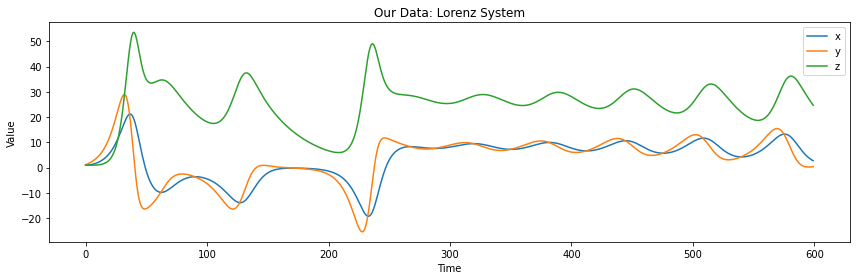

In [49]:
# Plot the data over time
fig, ax = plt.subplots(1, 1, figsize=(12, 4))

ax.plot(x[0, :], label='x')
ax.plot(x[1, :], label='y')
ax.plot(x[2, :], label='z')

ax.set_xlabel('Time')
ax.set_ylabel('Value')
ax.set_title('Our Data: Lorenz System')
ax.legend()

plt.tight_layout()
plt.show()

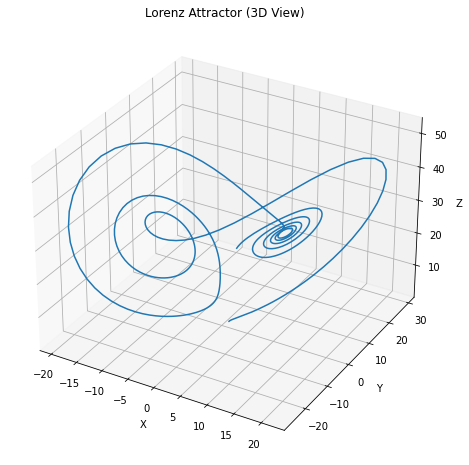

In [50]:
# Plot in 3D (the famous butterfly shape)
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

ax.plot(x[0, :], x[1, :], x[2, :])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Lorenz Attractor (3D View)')

plt.show()

---
## Step 4: Create the dLDS model

Now we create our model. Here are the important settings:

| Setting | What it does | Recommended |
|---------|--------------|-------------|
| `num_subdyns` | Number of dynamics operators | Start with 3-5 |
| `solver` | How to solve for coefficients | `'spgl1'` (default) |
| `reg_term` | Sparsity control | 0.1 - 1.0 |
| `smooth_term` | Makes coefficients smoother | 0.0 - 1.0 |
| `step_f` | Learning rate | 5.0 - 15.0 |
| `max_iter` | Maximum iterations | 100 - 1000 |

**Note:** You can experiment with these values later!

In [51]:
# Create the model
model = Direct_dLDS(
    num_subdyns=5,           # 5 dynamics operators
    solver='spgl1',          # recommended solver
    reg_term=0.5,            # sparsity control
    step_f=25.0,             # learning rate
    max_iter=200,            # max iterations
    smooth_term=0.5,         # smoothness of coefficients
    verbose=1,               # show progress (1=yes, 0=no)
    sigma_perturbation=0.5,  # noise when stuck
    num_no_change_thresh=15 , # iterations before adding noise
     max_error_relative=0.05
)

print("Model created!")

Model created!


---
## Step 5: Fit the model to data

This is the main step. The model will:

1. Learn the dynamics operators `F` (the rules)
2. Learn the coefficients `c` (how much each rule is used at each time)

**This may take a few seconds...**

In [52]:
# Fit the model
result = model.fit(x)

print("\nDone!")

Direct_dLDS Fitting
Number of trials: 1
Trial lengths: [600]
Latent dimension: 3
Number of dynamics operators (M): 5
Solver: spgl1
Regularization (τ): 0.5
Max error threshold: 8.961684
------------------------------------------------------------


Fitting:   0%|                                          | 0/200 [00:00<?, ?it/s]

Restoring best iterate to objective 15.268277197028127
Restoring best iterate to objective 15.314266541691037
Restoring best iterate to objective 7.2510309145947165
Restoring best iterate to objective 7.043217821540686
Restoring best iterate to objective 18.395744174089845
Restoring best iterate to objective 12.566197953537786
Restoring best iterate to objective 6.065167203217726
Restoring best iterate to objective 7.251263557194726
Restoring best iterate to objective 3.6526190269059398
Restoring best iterate to objective 3.3214883727975897
Restoring best iterate to objective 5.602777656125223
Restoring best iterate to objective 6.269873313961501
Restoring best iterate to objective 6.546285780242257
Restoring best iterate to objective 6.778019635713398


Fitting:  29%|▎| 58/200 [00:41<01:49,  1.30it/s, error=66.990255, step_f=0.0586]

Restoring best iterate to objective 10.218196488078586
Restoring best iterate to objective 6.76213260406686
Restoring best iterate to objective 1.7526863366666248
Restoring best iterate to objective 2.920575193106062
Restoring best iterate to objective 6.6460782209363165


Fitting:  30%|▎| 59/200 [00:44<03:29,  1.49s/it, error=61.245152, step_f=0.0000]

Restoring best iterate to objective 10.218196488078586
Restoring best iterate to objective 6.76213260406686
Restoring best iterate to objective 1.7526863366666248
Restoring best iterate to objective 2.920575193106062
Restoring best iterate to objective 6.6460782209363165


Fitting:  30%|▎| 60/200 [00:47<04:27,  1.91s/it, error=61.245152, step_f=0.0000]

Restoring best iterate to objective 10.218196488078586
Restoring best iterate to objective 6.76213260406686
Restoring best iterate to objective 1.7526863366666248
Restoring best iterate to objective 2.920575193106062
Restoring best iterate to objective 6.6460782209363165


Fitting:  30%|▎| 61/200 [00:50<05:04,  2.19s/it, error=61.245152, step_f=0.0000]

Restoring best iterate to objective 10.218196488078586
Restoring best iterate to objective 6.76213260406686
Restoring best iterate to objective 1.7526863366666248
Restoring best iterate to objective 2.920575193106062
Restoring best iterate to objective 6.6460782209363165


Fitting:  31%|▎| 62/200 [00:52<05:28,  2.38s/it, error=61.245152, step_f=0.0000]

Restoring best iterate to objective 10.218196488078586
Restoring best iterate to objective 6.76213260406686
Restoring best iterate to objective 1.7526863366666248
Restoring best iterate to objective 2.920575193106062
Restoring best iterate to objective 6.6460782209363165


Fitting:  32%|▎| 63/200 [00:55<05:48,  2.54s/it, error=61.245152, step_f=0.0000]

Restoring best iterate to objective 10.218196488078586
Restoring best iterate to objective 6.76213260406686
Restoring best iterate to objective 1.7526863366666248
Restoring best iterate to objective 2.920575193106062
Restoring best iterate to objective 6.6460782209363165


Fitting:  32%|▎| 64/200 [00:58<05:56,  2.62s/it, error=61.245152, step_f=0.0000]

Restoring best iterate to objective 10.218196488078586
Restoring best iterate to objective 6.76213260406686
Restoring best iterate to objective 1.7526863366666248
Restoring best iterate to objective 2.920575193106062
Restoring best iterate to objective 6.6460782209363165


Fitting:  32%|▎| 65/200 [01:01<06:10,  2.75s/it, error=61.245152, step_f=0.0000]

Restoring best iterate to objective 10.218196488078586
Restoring best iterate to objective 6.76213260406686
Restoring best iterate to objective 1.7526863366666248
Restoring best iterate to objective 2.920575193106062
Restoring best iterate to objective 6.6460782209363165


Fitting:  33%|▎| 66/200 [01:06<07:30,  3.37s/it, error=61.245152, step_f=0.0000]

Restoring best iterate to objective 10.218196488078586
Restoring best iterate to objective 6.76213260406686
Restoring best iterate to objective 1.7526863366666248
Restoring best iterate to objective 2.920575193106062
Restoring best iterate to objective 6.6460782209363165


Fitting:  34%|▎| 67/200 [01:11<08:50,  3.99s/it, error=61.245152, step_f=0.0000]

Restoring best iterate to objective 10.218196488078586
Restoring best iterate to objective 6.76213260406686
Restoring best iterate to objective 1.7526863366666248
Restoring best iterate to objective 2.920575193106062
Restoring best iterate to objective 6.6460782209363165


Fitting:  34%|▎| 68/200 [01:20<11:38,  5.29s/it, error=61.245152, step_f=0.0000]

Restoring best iterate to objective 10.218196488078586
Restoring best iterate to objective 6.76213260406686
Restoring best iterate to objective 1.7526863366666248
Restoring best iterate to objective 2.920575193106062
Restoring best iterate to objective 6.6460782209363165


Fitting:  34%|▎| 69/200 [01:26<12:07,  5.55s/it, error=61.245152, step_f=0.0000]

Restoring best iterate to objective 10.218196488078586
Restoring best iterate to objective 6.76213260406686
Restoring best iterate to objective 1.7526863366666248
Restoring best iterate to objective 2.920575193106062
Restoring best iterate to objective 6.6460782209363165


Fitting:  35%|▎| 70/200 [01:30<10:50,  5.00s/it, error=61.245152, step_f=0.0000]

Restoring best iterate to objective 10.218196488078586
Restoring best iterate to objective 6.76213260406686
Restoring best iterate to objective 1.7526863366666248
Restoring best iterate to objective 2.920575193106062
Restoring best iterate to objective 6.6460782209363165


Fitting:  36%|▎| 71/200 [01:33<09:29,  4.41s/it, error=61.245152, step_f=0.0000]

Restoring best iterate to objective 10.218196488078586
Restoring best iterate to objective 6.76213260406686
Restoring best iterate to objective 1.7526863366666248
Restoring best iterate to objective 2.920575193106062
Restoring best iterate to objective 6.6460782209363165


Fitting:  36%|▎| 72/200 [01:36<08:37,  4.05s/it, error=61.245152, step_f=0.0000]

Restoring best iterate to objective 10.218196488078586
Restoring best iterate to objective 6.76213260406686
Restoring best iterate to objective 1.7526863366666248
Restoring best iterate to objective 2.920575193106062
Restoring best iterate to objective 6.6460782209363165


Fitting:  36%|▎| 73/200 [01:41<09:02,  4.27s/it, error=61.245152, step_f=0.0000]

Restoring best iterate to objective 17.389499722783064
Restoring best iterate to objective 17.416898468720696
Restoring best iterate to objective 17.329287647677702
Restoring best iterate to objective 13.760287264227765
Restoring best iterate to objective 4.487372439276188
Restoring best iterate to objective 6.469134767671863
Restoring best iterate to objective 6.2184824201979385
Restoring best iterate to objective 5.935228508711378
Restoring best iterate to objective 1.4628379826949225
Restoring best iterate to objective 1.3469152388024177
Restoring best iterate to objective 8.77495225622534
Restoring best iterate to objective 8.916763523375364
Restoring best iterate to objective 2.2001571217985956
Restoring best iterate to objective 5.331549021646013
Restoring best iterate to objective 2.49195244792445
Restoring best iterate to objective 11.283022825796726
Restoring best iterate to objective 8.16419220703842
Restoring best iterate to objective 7.65367023204809
Restoring best iterate 

Fitting:  37%|▎| 74/200 [01:48<10:55,  5.20s/it, error=32.400975, step_f=0.0000]

Restoring best iterate to objective 15.089693478824396
Restoring best iterate to objective 15.17901822318214
Restoring best iterate to objective 15.455573439241817
Restoring best iterate to objective 16.150308139168406
Restoring best iterate to objective 16.62527867773827
Restoring best iterate to objective 14.055204894128783
Restoring best iterate to objective 13.587539686535768
Restoring best iterate to objective 10.625989973027076
Restoring best iterate to objective 12.129241128637275
Restoring best iterate to objective 3.0386085470487223
Restoring best iterate to objective 4.262639943096136
Restoring best iterate to objective 5.4336341309438
Restoring best iterate to objective 6.302376494040475
Restoring best iterate to objective 6.403724223916273
Restoring best iterate to objective 4.285098151253785
Restoring best iterate to objective 2.96932541055488
Restoring best iterate to objective 1.068007025186015
Restoring best iterate to objective 0.3858203228101304
Restoring best iterate

Fitting:  38%|▍| 75/200 [01:54<11:00,  5.28s/it, error=22.986141, step_f=0.0000]

Restoring best iterate to objective 13.670114671232962
Restoring best iterate to objective 13.850588175610895
Restoring best iterate to objective 14.851752069653744
Restoring best iterate to objective 14.437519382773196
Restoring best iterate to objective 13.590425454214959
Restoring best iterate to objective 9.838088204418739
Restoring best iterate to objective 8.156127309744011
Restoring best iterate to objective 3.204794709625738
Restoring best iterate to objective 1.7007743992056967
Restoring best iterate to objective 8.362651273354395
Restoring best iterate to objective 10.882697586359642
Restoring best iterate to objective 7.698356432481329
Restoring best iterate to objective 0.04479245912270716
Restoring best iterate to objective 2.0108135837510903
Restoring best iterate to objective 3.8094076312958407
Restoring best iterate to objective 4.192251341334597
Restoring best iterate to objective 5.8821523529519215
Restoring best iterate to objective 6.371510214809262
Restoring best i

Fitting:  38%|▍| 76/200 [01:58<10:38,  5.15s/it, error=15.858457, step_f=0.0000]

Restoring best iterate to objective 13.347857838283929
Restoring best iterate to objective 13.507311532088845
Restoring best iterate to objective 8.002457111099234
Restoring best iterate to objective 5.449310507022148
Restoring best iterate to objective 3.6497010532591276
Restoring best iterate to objective 1.800520386593231
Restoring best iterate to objective 0.9915049509043826
Restoring best iterate to objective 0.06338426840851065
Restoring best iterate to objective 0.047922685232425835
Restoring best iterate to objective 0.22149578417505805
Restoring best iterate to objective 11.035736985445002
Restoring best iterate to objective 8.979763000780691
Restoring best iterate to objective 0.08714978938545345
Restoring best iterate to objective 0.29585712912729595
Restoring best iterate to objective 0.3810019620209641
Restoring best iterate to objective 1.6246334291929456
Restoring best iterate to objective 3.7653649360577672
Restoring best iterate to objective 5.708534011898143
Restoring

Fitting:  38%|▍| 77/200 [02:03<10:17,  5.02s/it, error=10.831827, step_f=0.0000]

Restoring best iterate to objective 8.172873414991079
Restoring best iterate to objective 10.718599426228119
Restoring best iterate to objective 11.832996236959453
Restoring best iterate to objective 11.413718647281069
Restoring best iterate to objective 3.3698457101332866
Restoring best iterate to objective 0.03549460618412736
Restoring best iterate to objective 0.04557791730877314
Restoring best iterate to objective 0.039978843511184366
Restoring best iterate to objective 3.9219841787749727
Restoring best iterate to objective 4.474920216588829
Restoring best iterate to objective 0.02515562430561422
Restoring best iterate to objective 1.709545487758179
Restoring best iterate to objective 1.2861778483686852
Restoring best iterate to objective 0.36051407680427083
Restoring best iterate to objective 0.8657072708338632
Restoring best iterate to objective 0.9686846918071673
Restoring best iterate to objective 0.0020304051583362923
Restoring best iterate to objective 0.006875338951623568
Re

Fitting:  38%|▍| 77/200 [02:06<03:21,  1.64s/it, error=10.831827, step_f=0.0000]

Restoring best iterate to objective 0.01558285177392247
Restoring best iterate to objective 1.9950517998801545
Restoring best iterate to objective 1.1872980477066624

Converged at iteration 77 with error 6.965708
------------------------------------------------------------
Training converged.
Final error: 6.965708

To reconstruct data, call: x_hat = model.reconstruct(data)

Done!


---
## Step 6: Look at the results

After fitting, we can look at what the model learned.

**What is in `result`?**

| Attribute | What it is |
|-----------|------------|
| `result.F` | List of F matrices (the dynamics operators) |
| `result.dynamic_coefficients` | The coefficients c(t) |

In [56]:
# Print a summary
result.summary()

dLDS Fitting Results
Converged: True
Iterations: 78
--------------------------------------------------
Number of dynamics operators (M): 5
Latent dimension (p): 3
Number of trials: 1
Trial lengths: [600]
--------------------------------------------------
F shapes: [(3, 3), (3, 3), (3, 3), (3, 3), (3, 3)]
Coefficient shapes: [(5, 599)]


In [57]:
# Get the learned operators F
F_list = result.F
print("Number of F matrices:", len(F_list))
print("Shape of each F:", F_list[0].shape)

Number of F matrices: 5
Shape of each F: (3, 3)


In [58]:
# Get the coefficients
coefficients = result.dynamic_coefficients
c_trial0 = coefficients[0]  # coefficients for trial 0

print("Shape of coefficients:", c_trial0.shape)
print("This means: %d operators, %d time points" % (c_trial0.shape[0], c_trial0.shape[1]))

Shape of coefficients: (5, 599)
This means: 5 operators, 599 time points


In [59]:
# Get the error history
errors = result.error_history
print("Final error:", result.final_error)

Final error: 6.9657080937735


---
## Step 7: Reconstruct the data

Now let's use the model to reconstruct (predict) the data.

If the model is good, the reconstruction should look like the original data.

In [60]:
# Reconstruct
x_hat = model.reconstruct(x)

# Calculate error
mse = np.mean((x - x_hat) ** 2)
print("Reconstruction MSE:", mse)

Reconstruction MSE: 2.3180328600946267


---
## Step 8: Visualize everything

Now let's make nice plots to understand the results.

### 8.1 Original vs Reconstructed

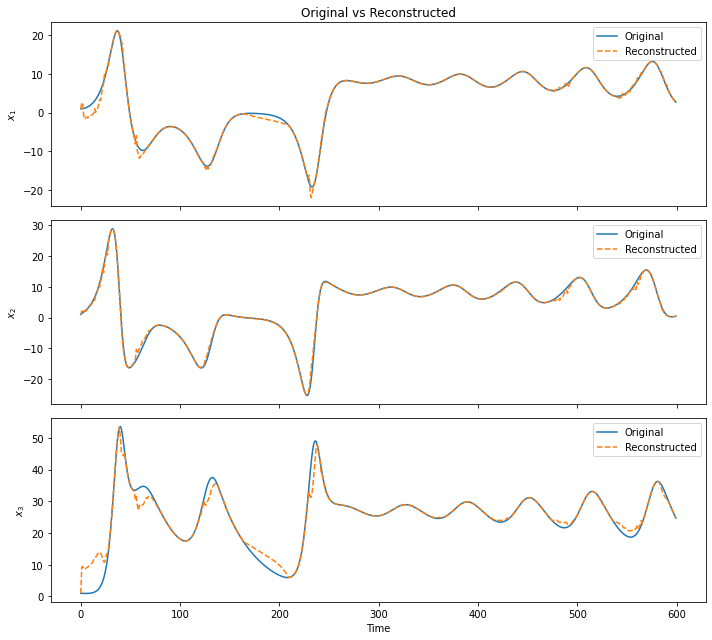

(<Figure size 720x648 with 3 Axes>,
 array([<AxesSubplot:title={'center':'Original vs Reconstructed'}, ylabel='$x_{1}$'>,
        <AxesSubplot:ylabel='$x_{2}$'>,
        <AxesSubplot:xlabel='Time', ylabel='$x_{3}$'>], dtype=object))

In [61]:
# Plot original vs reconstructed
plot_reconstruction(x, x_hat, dims=[0, 1, 2])

### 8.2 Training Error

This shows how the error decreased during training.

- The error should go down
- If it goes flat, the model has converged (finished learning)

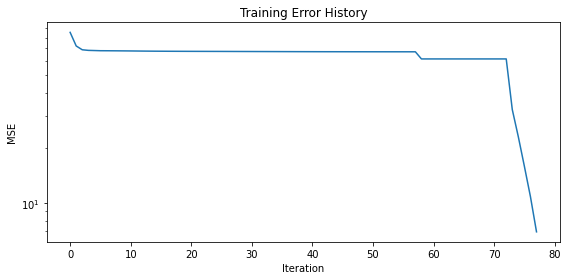

(<Figure size 576x288 with 1 Axes>,
 <AxesSubplot:title={'center':'Training Error History'}, xlabel='Iteration', ylabel='MSE'>)

In [62]:
# Plot error history
plot_error_history(result.error_history)

### 8.3 The Coefficients

The coefficients `c(t)` show which dynamics operator is active at each time.

- Each line is one operator
- High value = that operator is active
- Low value = that operator is not used

In [65]:
def plot_coefficients_heatmap(coefficients, trial_idx=0, path_save=None, fig_title='coefficients_heatmap', cmap = 'PiYG'):
    """
    Plot dynamics coefficients as heatmap.
    """
    if isinstance(coefficients, list):
        c = coefficients[trial_idx]
    else:
        c = coefficients
    
    fig, ax = plt.subplots(1, 1, figsize=(12, 3))
    
    sns.heatmap(c, ax=ax, cmap=cmap, cbar_kws={'shrink': 0.8}, center = 0 )
    ax.set_xlabel('Time')
    ax.set_ylabel('$c_m$')
    ax.set_title('Dynamics Coefficients')
    yticks = ['$c_{%d}$' % (m + 1) for m in range(c.shape[0])]
    ax.set_yticklabels(yticks, rotation=0)
    
    plt.tight_layout()
    plt.show()
    
    if path_save is not None:
        save_fig(fig_title, fig, path_save)
    
    return fig, ax


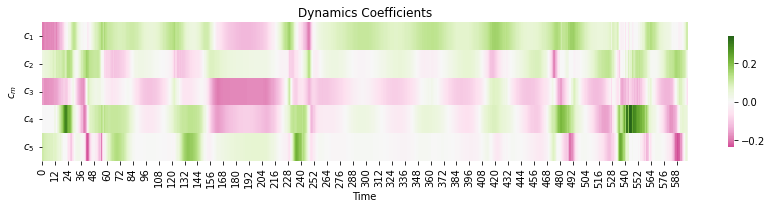

(<Figure size 864x216 with 2 Axes>,
 <AxesSubplot:title={'center':'Dynamics Coefficients'}, xlabel='Time', ylabel='$c_m$'>)

In [67]:
# Plot coefficients as heatmap
plot_coefficients_heatmap(result.dynamic_coefficients, trial_idx=0)

### 8.4 The Dynamics Operators F

Each F matrix describes one type of dynamics (one "rule").

- Red = positive values
- Blue = negative values
- White = zero

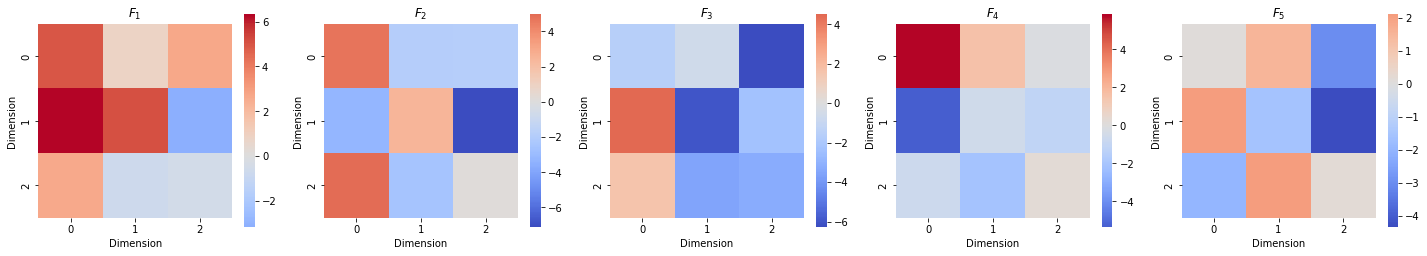

(<Figure size 1440x288 with 10 Axes>,
 array([<AxesSubplot:title={'center':'$F_{1}$'}, xlabel='Dimension', ylabel='Dimension'>,
        <AxesSubplot:title={'center':'$F_{2}$'}, xlabel='Dimension', ylabel='Dimension'>,
        <AxesSubplot:title={'center':'$F_{3}$'}, xlabel='Dimension', ylabel='Dimension'>,
        <AxesSubplot:title={'center':'$F_{4}$'}, xlabel='Dimension', ylabel='Dimension'>,
        <AxesSubplot:title={'center':'$F_{5}$'}, xlabel='Dimension', ylabel='Dimension'>],
       dtype=object))

In [68]:
# Plot all F matrices
plot_F(result.F)

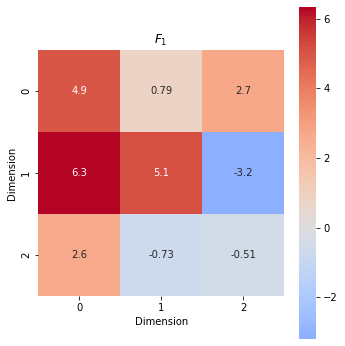

(<Figure size 360x360 with 2 Axes>,
 <AxesSubplot:title={'center':'$F_{1}$'}, xlabel='Dimension', ylabel='Dimension'>)

In [69]:
# Plot just the first F
plot_single_F(result.F[0], idx=0)

### 8.5 Trajectory Colored by Dominant Dynamics

This is a cool plot! It shows the trajectory in 3D, with colors showing which dynamics operator is most active at each point.

- Different colors = different dynamics
- This helps you see where the dynamics change

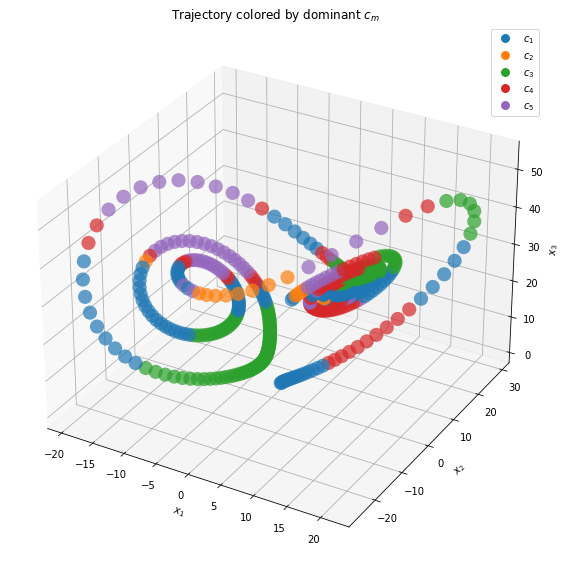

(<Figure size 576x576 with 1 Axes>,
 <Axes3DSubplot:title={'center':'Trajectory colored by dominant $c_m$'}, xlabel='$x_{1}$', ylabel='$x_{2}$'>)

In [72]:
# Plot trajectory colored by dominant dynamics
plot_scatter_by_dominant_subdynamics(x, c_trial0)

### 8.6 3D Trajectory

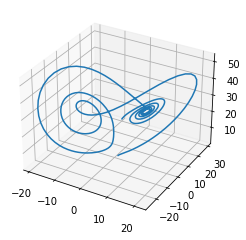

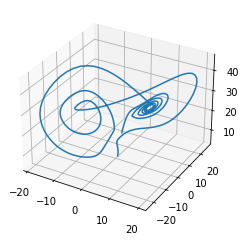

In [78]:
# Simple 3D trajectory plot
plot_3d(x)
plot_3d(gaussian_convolve(x_hat, direction = 1))

### 8.7 Combined Dynamics at a Specific Time

At each time, the combined dynamics is:

$$F_t = \sum_m c_{m,t} \cdot f_m$$

Let's look at the combined F at time t=50.

Shape of F_combined: (3, 3, 599)
This means: 3 x 3 matrix at each of 599 time points


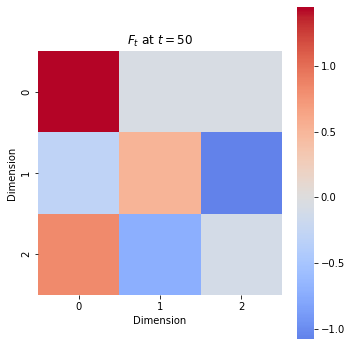

(<Figure size 360x360 with 2 Axes>,
 <AxesSubplot:title={'center':'$F_t$ at $t=50$'}, xlabel='Dimension', ylabel='Dimension'>)

In [79]:
# Get combined F
F_combined = result.get_combined_F(trial_idx=0)
print("Shape of F_combined:", F_combined.shape)
print("This means: %d x %d matrix at each of %d time points" % F_combined.shape)

# Plot at time t=50
plot_combined_F(F_combined, time_idx=50)

---
## Step 9: Save your plots (optional)

You can save any plot by adding `to_save=True` and `path_save='your_folder/'`

In [80]:
# Example: save the F matrices plot
# plot_F(result.F, to_save=True, path_save='figures/', fig_title='my_F_matrices')

---
## Summary

**What we did:**

1. ✅ Loaded libraries
2. ✅ Created Lorenz data
3. ✅ Looked at the data
4. ✅ Created a dLDS model
5. ✅ Fit the model
6. ✅ Looked at results
7. ✅ Reconstructed the data
8. ✅ Made nice visualizations

**Next steps:**

- Try with your own data!
- Experiment with different `num_subdyns`
- Try different `reg_term` and `smooth_term` values
- See the README for more tips



---
## Appendix: Use Your Own Data

Here is how to use your own data:

In [ ]:
# Option A: From a numpy file
# my_data = np.load('my_data.npy')

# Option B: From a CSV file
# my_data = np.loadtxt('my_data.csv', delimiter=',')

# Option C: From a .mat file (MATLAB)
# import scipy.io
# mat = scipy.io.loadmat('my_data.mat')
# my_data = mat['data']

# IMPORTANT: Make sure shape is (n_dims, T), not (T, n_dims)
# If your data is (T, n_dims), transpose it:
# my_data = my_data.T

# Then fit:
# model = Direct_dLDS(num_subdyns=3)
# result = model.fit(my_data)